In [1]:
ipip install numpy

SyntaxError: invalid syntax (794943250.py, line 1)

In [1]:
import numpy as np

In [ ]:
pip install pandas

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('C:/Users/megha/PROJECTS/Video games sales analysis/VideoGamesSales.csv')

In [25]:
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


In [4]:
df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,$41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,$29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,$15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,$15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,$11.27,31.37,3.381,9.411


In [53]:
df.shape

(5909, 15)

In [165]:
df.shape[0]   # 0 is for rows and 1 for columns, therfore 15 cols

3108

In [5]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:/Users/megha/PROJECTS/Video games sales analysis/VideoGamesSales.csv')
# df.duplicated()
df=df.drop_duplicates()
df['Region']=df["Region"].fillna('North')
# df.info()
# df=df[df['Region'].isnull()]
# df.shape[0]
# # # df.head(100)
df['NA_Sales']=df['NA_Sales'].replace('[$]','',regex=True)
df['NA_Sales']=pd.to_numeric(df['NA_Sales'],errors='coerce')
# df['NA_Sales']
average_sales=df['NA_Sales'].mean()
average_sales=int(average_sales)
# average_sales
df['NA_Sales']=df['NA_Sales'].fillna(average_sales)

df['Country']=df['Country'].replace({'USA':'United States'})
df['Country']=df['Country'].str.title()
df=df[df['Country']=='Australia']


#Renaming
df=df.rename(columns={'NA_Sales':'National Sales','Global_Sales':'Global Sales','NA_Profit':'National Profit','Global_Profit':'Global Profit'})
# df.head(2)

#replacing outliers
sales_cap=df['National Sales'].quantile(0.95)
sales_cap
df['National Sales']=np.where(df['National Sales']>sales_cap,sales_cap,df['Global Sales'])
df.head(2)

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
2798,2787,Unreal Championship,XB,2010,Feb,Shooter,Atari,Australia,Adelaide,South Australia,South,0.49,0.74,0.177,0.222
2799,2788,WarioWare: Twisted!,GBA,2010,Mar,Puzzle,Unknown,Australia,Melbourne,Victoria,Other,0.74,0.74,0.048,0.222


In [6]:
import matplotlib.pyplot as plt

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

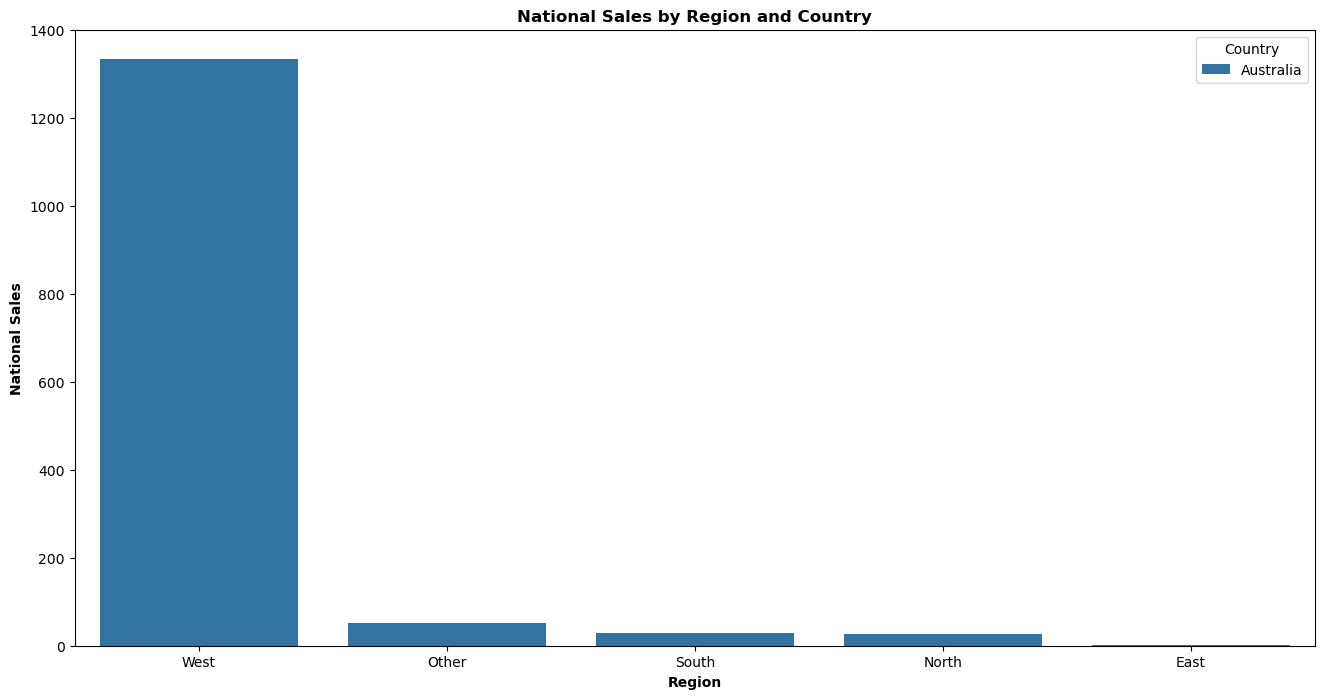

In [10]:
#create a bar Chart

National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by='National Sales', ascending=False)
National_Sales
plt.figure(figsize=(16, 8))
sns.barplot(data=National_Sales, x='Region', y='National Sales',hue='Country')
plt.title('National Sales by Region and Country',fontweight='bold')
plt.xlabel('Region',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()

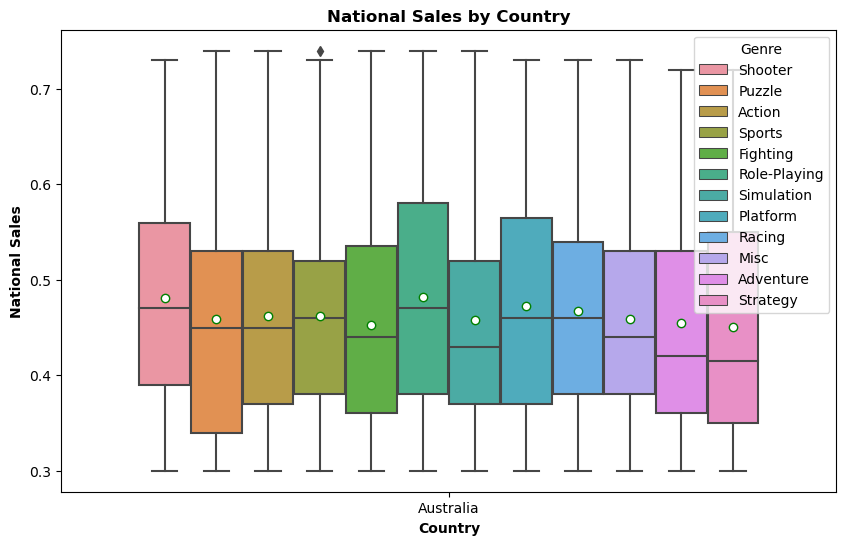

In [11]:
#Create Box Plot
# ,meanprops={"marker":"o"
#                                                                                   ,"markerfacecolor":"white"
#                                                                                   ,"markersize":"3"
#                                                                                   ,"markeredgecolor":"green"}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='National Sales', data=df,showmeans=True,hue='Genre',meanprops={"marker":"o"
                                                                                   ,"markerfacecolor":"white"
                                                                                   ,"markersize":"6"
                                                                                 ,"markeredgecolor":"green"})

plt.title('National Sales by Country',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('National Sales',fontweight='bold')
plt.show()